[[-1 -1 -1 -1 -1  1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1 -1  1  1 -1 -1  1 -1 -1  1]
 [-1 -1  1  1  1 -1  1  1  1 -1]
 [ 1  1 -1  1 -1  1  1  1  1 -1]
 [ 1  1  1  1 -1 -1 -1  1 -1 -1]
 [-1  1 -1  1  1  1 -1  1  1  1]
 [-1 -1 -1  1  1  1  1 -1  1  1]
 [-1 -1  1  1 -1  1 -1 -1 -1 -1]
 [-1  1 -1  1 -1  1  1 -1  1 -1]]


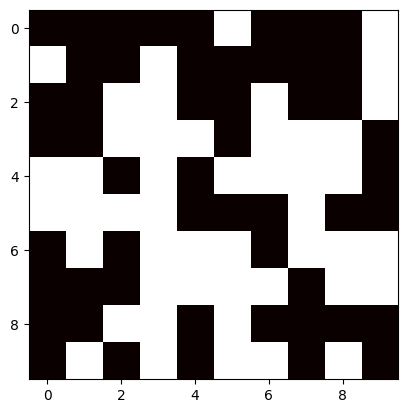

In [3]:
#we start with a 10 by grid of spins

import numpy as np
import matplotlib.pyplot as plt
import random

#initialize the grid with random spins given a grid size n
def initialize_grid(n):
    rng = np.random.default_rng()
    grid = rng.choice([-1,1], size=(n,n))
    return grid

#test that the grid is initialized correctly

#we're going to start with a 10 by 10 grid
grid = initialize_grid(10)
print(grid)

#use matplotlib to visualize the grid as a heatmap
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
#

In [4]:
#compute the energy of the grid
def compute_energy(grid):
    energy = 0
    n = len(grid)
    for i in range(n):
        for j in range(n):
            #check the energy at each point by selecting the nearest neighbors and checking whether they are the same spin
            #each neighbor contributes -1 to the energy if they are the same spin
            #each neighbor contributes +1 to the energy if they are the opposite spin
            energy += -grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    return energy

#test that the energy is computed correctly
print(compute_energy(grid))

-32


In [7]:
def generate_energy_map(grid):
    n = len(grid)
    energy_map = np.zeros((n,n), dtype=int)
    for i in range(n):
        for j in range(n):
            energy_map[i,j] = -grid[i,j]*(grid[(i+1)%n,j] + grid[i,(j+1)%n] + grid[(i-1)%n,j] + grid[i,(j-1)%n])
    return energy_map

#test that the energy map is computed correctly
energy_map = generate_energy_map(grid) 
print(energy_map)

[[ 0 -2 -4  0 -2  2  0 -4  0  2]
 [ 2 -2  0  2 -2 -2 -2 -4 -2 -2]
 [ 0 -2  0 -2  0 -2  2  0  0  2]
 [-2  0  0 -4  2  2 -2 -2  0  0]
 [ 0  0  4  0  2  2 -2 -4  0  0]
 [ 0 -4  0 -2  0  0  0  0  2  0]
 [ 2  2  2 -2 -2  0  2  0 -2  0]
 [-2 -2  0 -2 -2 -4  2  2  0  0]
 [-4  0  2 -2  2  0  2 -4  0 -2]
 [-2  4  2  2  0 -2  2  0  4  0]]


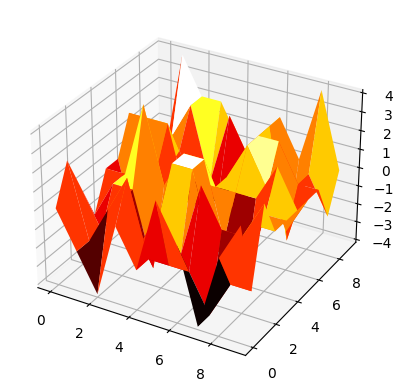

In [17]:
#prints the energy map as a 3d plot
from mpl_toolkits.mplot3d import Axes3D

def plot_energy_map(energy_map):
    n = len(energy_map)
    x = np.arange(n)
    y = np.arange(n)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, energy_map, cmap='hot')
    plt.show()

plot_energy_map(energy_map)

spin at (4,5) is flipped
[[-1 -1 -1 -1 -1  1 -1 -1 -1  1]
 [ 1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1 -1  1  1 -1 -1  1 -1 -1  1]
 [-1 -1  1  1  1 -1  1  1  1 -1]
 [ 1  1 -1  1 -1 -1  1  1  1 -1]
 [ 1  1  1  1 -1 -1 -1  1 -1 -1]
 [-1  1 -1  1  1  1 -1  1  1  1]
 [-1 -1 -1  1  1  1  1  1  1  1]
 [-1 -1  1  1 -1  1 -1 -1 -1 -1]
 [-1  1 -1  1 -1  1  1 -1  1 -1]]
-48


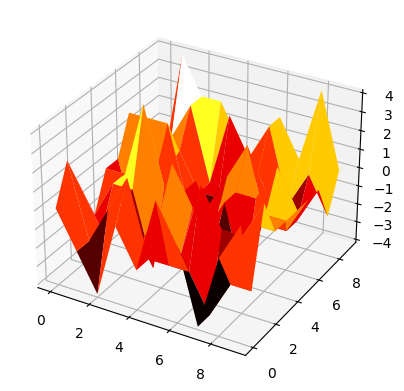

In [19]:
#flip a random spin in the grid
def flip_spin(grid):
    n = len(grid)
    i = random.randint(0,n-1)
    j = random.randint(0,n-1)
    grid[i,j] = -grid[i,j]
    print("spin at (" + str(i) + "," + str(j) + ") is flipped")
    return grid

#test that the spin is flipped correctly
changed_grid = flip_spin(grid)
print(changed_grid)
print(compute_energy(changed_grid))
plot_energy_map(generate_energy_map(changed_grid))

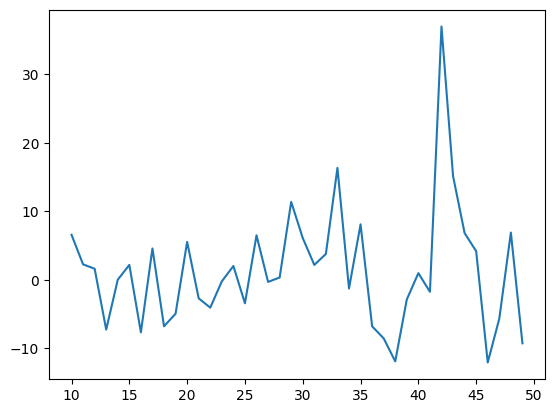

In [36]:
#lets approximate the average energy of the grid by averaging over many random configurations of size n by n
def average_energy(n):
    energy_sum = 0
    for i in range(100):
        grid = initialize_grid(n)
        energy_sum += compute_energy(grid)
    return energy_sum/100

#plot the average energy for different size matricies
n = np.arange(10,50)
energy = np.zeros(len(n))
for i in range(len(n)):
    energy[i] = average_energy(n[i])
plt.plot(n,energy)
plt.show()

